In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
path = r"XXXX-XXXX"
con = sqlite3.connect(path)
cur = con.cursor()
forward = pd.read_sql_query("SELECT *  FROM avgPlayerStatistics AS ps WHERE ps.player_position = 'G' ;", con,)

In [3]:
pd.set_option('display.max_columns', None)
forward.describe()


,index,assists,blocks,commited_fouls,commited_penalty,conceded,drawn_fouls,dribble_attempts,dribble_past,dribble_success,fixture_id,interceptions,key_passes,minutes,missed_penalty,number,offside,on_goal_shots,pass_accuracy,player_id,rating,red,saved_penalty,saves,scored_penalty,timestamp,total_duels,total_goals,total_passes,total_shots,total_tackels,won_duels,won_penalty,yellow
count,28407.000000,28407.000000,28407.000000,28407.0,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.0,28407.000000,28407.00000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,2.840700e+04,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.0,28407.000000
mean,24036.911360,0.001833,0.000021,0.0,0.002454,1.332007,0.131309,0.021996,0.039789,0.020451,176497.918189,0.043800,0.025013,87.699553,0.000028,15.883026,0.0,0.000517,53.49456,21783.304890,6.631285,0.003295,0.023621,2.902192,0.000035,1.533288e+09,0.431843,0.000221,18.395805,0.002380,0.012367,0.357567,0.0,0.048240
std,14425.467492,0.021493,0.002055,0.0,0.022542,0.658161,0.186902,0.075842,0.099824,0.073484,206154.125410,0.104692,0.078616,10.456881,0.002373,22.446928,0.0,0.012912,19.57080,22888.210145,1.128815,0.029587,0.076861,1.096782,0.002653,5.470373e+07,0.401260,0.010383,7.014478,0.025062,0.053563,0.361519,0.0,0.105792
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.438972e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,11583.000000,0.000000,0.000000,0.0,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,16953.500000,0.000000,0.000000,90.000000,0.000000,1.000000,0.0,0.000000,43.80000,1624.000000,6.600000,0.000000,0.000000,2.200000,0.000000,1.486311e+09,0.000000,0.000000,13.600000,0.000000,0.000000,0.000000,0.0,0.000000
50%,23078.000000,0.000000,0.000000,0.0,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,157025.000000,0.000000,0.000000,90.000000,0.000000,1.000000,0.0,0.000000,56.40000,20355.000000,6.820000,0.000000,0.000000,2.800000,0.000000,1.535914e+09,0.400000,0.000000,17.200000,0.000000,0.000000,0.200000,0.0,0.000000
75%,36520.000000,0.000000,0.000000,0.0,0.000000,1.800000,0.200000,0.000000,0.000000,0.000000,209187.500000,0.000000,0.000000,90.000000,0.000000,25.000000,0.0,0.000000,67.20000,37113.000000,7.040000,0.000000,0.000000,3.600000,0.000000,1.579976e+09,0.600000,0.000000,22.000000,0.000000,0.000000,0.600000,0.0,0.000000
max,49973.000000,1.000000,0.200000,0.0,0.400000,6.000000,2.000000,1.000000,2.000000,1.000000,705683.000000,1.000000,1.000000,105.000000,0.200000,99.000000,0.0,1.000000,100.00000,290685.000000,9.500000,1.000000,1.000000,12.000000,0.200000,1.622398e+09,4.000000,1.000000,59.666667,1.000000,1.000000,4.000000,0.0,1.000000


In [5]:
def drop_columns(df):
    df.drop(columns='fixture_id', inplace=True)
    df.drop(columns='index', inplace=True)
    df.drop(columns='timestamp', inplace=True)
    df.drop(columns='player_id', inplace=True)
    df.drop(columns='number', inplace=True)
    #drop mit mean 0 
    df.drop(columns='offside', inplace=True)
    df.drop(columns='total_goals', inplace=True)
    df.drop(columns='commited_fouls', inplace=True)
    df.drop(columns='won_penalty', inplace=True)
    df.drop(columns='on_goal_shots', inplace=True)

drop_columns(forward)
print(len(forward.columns))

25


In [6]:
def drop_columns_withour_corr(df):
    df.drop(columns='yellow', inplace=True)
    df.drop(columns='red', inplace=True)
    df.drop(columns='missed_penalty', inplace=True)
    df.drop(columns='commited_penalty', inplace=True)

drop_columns_withour_corr(forward)

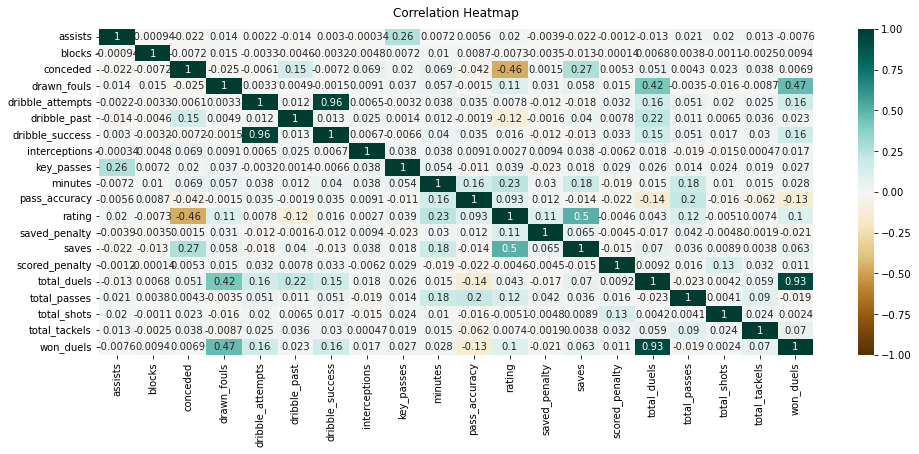

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(forward.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

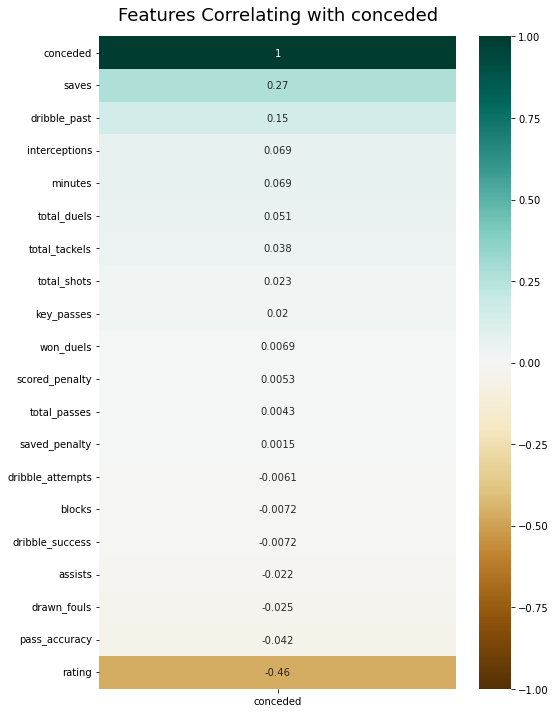

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['conceded']].sort_values(by='conceded', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with conceded', fontdict={'fontsize':18}, pad=16);

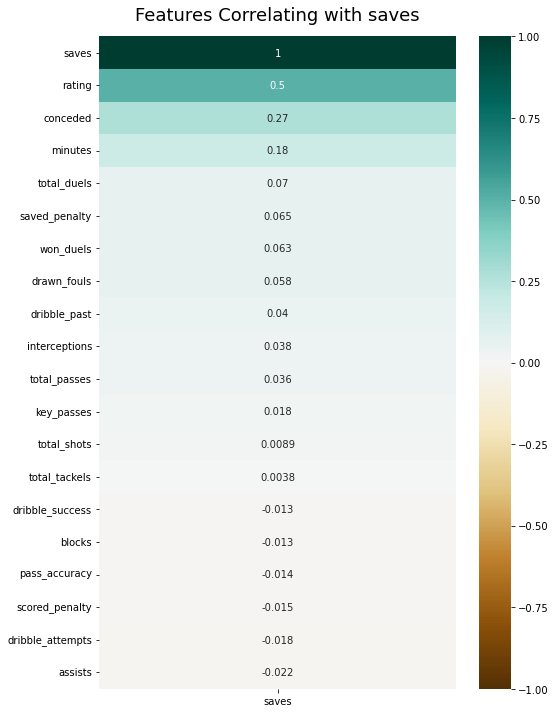

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['saves']].sort_values(by='saves', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with saves', fontdict={'fontsize':18}, pad=16);

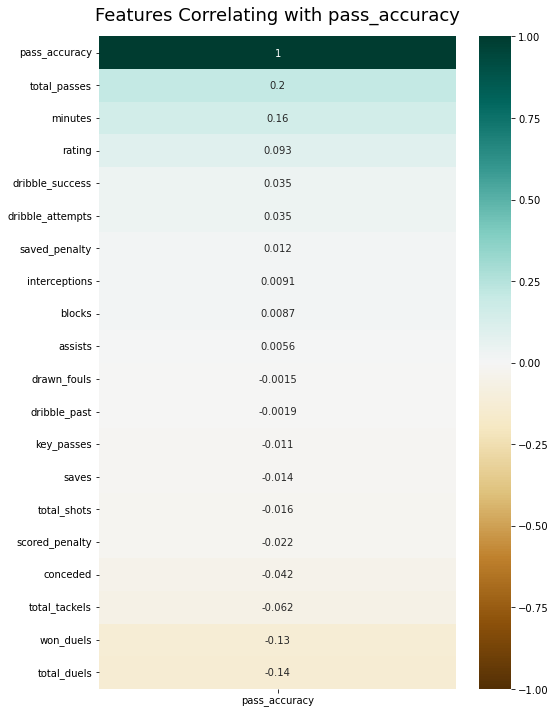

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['pass_accuracy']].sort_values(by='pass_accuracy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pass_accuracy', fontdict={'fontsize':18}, pad=16);

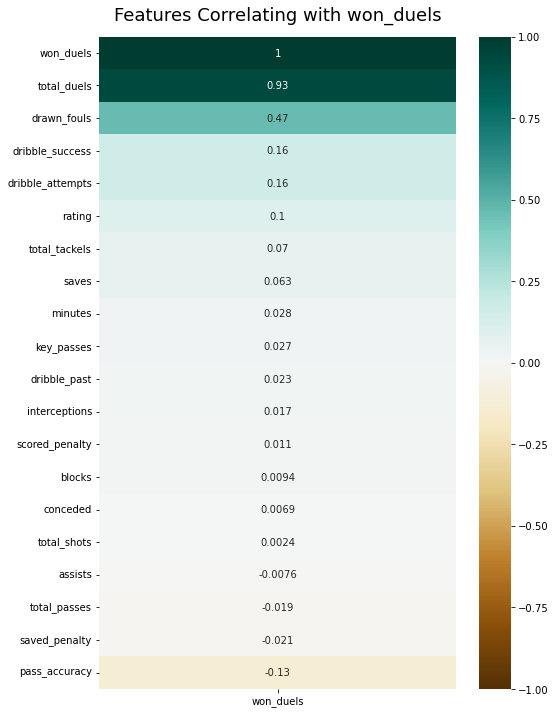

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['won_duels']].sort_values(by='won_duels', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with won_duels', fontdict={'fontsize':18}, pad=16);

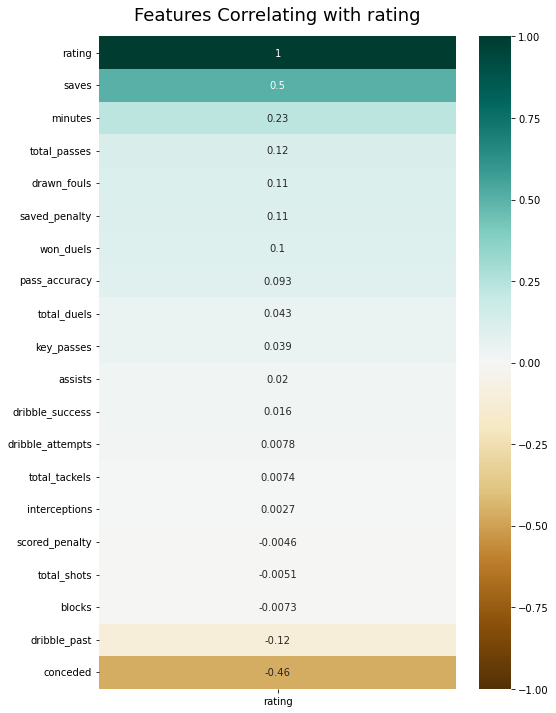

In [12]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(forward.corr(method='spearman')[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with rating', fontdict={'fontsize':18}, pad=16);